# Heterogeneous Agents - Solving the Aiyagari problem - OSE - Tony Smith 

## Jeanne Sorin

### Calibrate the transition probability

In [12]:
import numpy as np
from scipy.optimize import root
from matplotlib import pyplot as plt
from scipy.optimize import minimize


### This optimizer allows to put bounds on the choice variables
### Works
from scipy.optimize import minimize_scalar
from scipy import interpolate


In [13]:
# Define the employment status
ϵ = np.array((1.0, 0.0))

# Calibrate the transition probability
A = np.array([0.90, 0.1])
Trans= np.array([[0.90,0.10], [0.90, 0.10]] )
Ubar = 0.05
α = 0.36
β = 0.96
δ = 0.06


def rf(k, u):
    r = α*k**(α-1)*(1-u)**(1-α)
    return r
    
def wf(k, u):
    w = (1-α)*k**(α) * (1-u)**(-α)
    return w

# Define the FOC of the HH

def utility(c):
    U = 0
    if c > 0:
        U = np.log(c)
    if c <= 0:
        U = -99999999
    return U

def uprime(c):
    Up = -1/(c)
    return Up

'''
From the intertemporal EE, and the the definition of k and w as a function of k
'''

def find_K_SS(α, β, δ, u):
    k_ss = ((1/β - 1 + δ) / (α*(1 - u) **(1-α))) ** (1 / (α-1)) 
    return(k_ss)

Kss = find_K_SS(α, β, δ, Ubar)
Kss

    

6.850617572969538

### Compute the steady state equilibrium value of aggregate capital kss*

#### 1. Guess on kss from the representative-agent economy in ss

In [14]:
def interpolant(x,Kgrid,Vp):
    t = interpolate.interp1d(Kgrid,Vp,fill_value="extrapolate")
    return t(x)


def Bellman(kp, *params):
    r, w, Kgrid, Vp, ϵ, ik, ie, Trans = params
    #print("Before U")
    today = utility(r*Kgrid[ik] + w*ϵ[ie] + (1-δ)*Kgrid[ik] - kp)
    #print("Computed utility ", today)
    
    fut = 0
    #print("Computing future")
    for i in range(Nϵ):
        #print("fut is ", fut)
        fut +=  Trans[ie,i]*interpolant(kp,Kgrid,Vp[:,i])  
        
    #print("Computed future ", fut)

    Value = today + β * fut
    #print("Computed total")
    
    
    '''
    You would like to keep tract of when c < 0 and you set u = -99999999 ?
    Maybe this could explain why the policy function is below the 45 degree line.
    '''
    
    return - Value



#### 2. Restrict k to lie on a grid of N = 200 points in the interval [0.001, 40] and then iterate on the Bellman equation to find v(k, e, kss) at each of the pairs in k*e

Use value function iteration for the policy function to know how k' depends on k.

In [15]:
n = 50
Nϵ = 2
tol = 1e-6
ϵ = np.array([1.,0.])
maxiter = 2000

# Make Grid


Klow = 0.01
Khigh = 40.

Kgrid = np.linspace(Klow, Khigh, n)


Vp = Klow*np.ones([n, Nϵ])
Kp= Klow*np.ones([n, Nϵ])
Vp_new = np.zeros([n, Nϵ])
Kp_new = np.zeros([n, Nϵ])



#### Run function

iter = 0
epsi = 1

r = rf(Kss, Ubar)
w = wf(Kss, Ubar) 

while (epsi > tol) & (iter < maxiter):
    
    
    for ik in range(n):
        
        for ie in range(Nϵ):
            
            params1 = r, w, Kgrid, Vp, ϵ, ik, ie, Trans
            #Solve = minimize(Bellman, Kp[ik, ie], args=(params1))
            Solve = minimize_scalar(Bellman, \
                      bounds=(Kgrid[ik]*0.00001,Kgrid[ik]*(1+r-δ)+w*ϵ[ie]), \
                      args=(params1), method='bounded' )
            Kp_new[ik, ie] = Solve.x
            Vp_new[ik, ie] = - Solve.fun
        

    iter += 1

    epsi = ((Vp_new - Vp) ** 2).sum()
    print("Error term: ", epsi)
    if epsi < tol:
        break
    #Update
    Kp = Kp_new*1.
    Vp = Vp_new*1.
    iter=iter+1

Kp_question2 = Kp
Vp_question2 = Vp

        

Error term:  879.9206881365067
Error term:  282.10788793270535
Error term:  159.78134424789252
Error term:  104.0141018269488
Error term:  72.98981522710542
Error term:  53.750346479202015
Error term:  40.967400303317554
Error term:  32.047305059895905
Error term:  25.588500169297095
Error term:  20.776749678153884
Error term:  17.0982489215029
Error term:  14.240737011879464
Error term:  11.973862064389637
Error term:  10.15491346516609
Error term:  8.679691009047962
Error term:  7.466896499852378
Error term:  6.458170554193687
Error term:  5.6146927644717195
Error term:  4.904866973406565
Error term:  4.3028935394448204
Error term:  3.7894040757667815
Error term:  3.348366265020109
Error term:  2.9672955886706776
Error term:  2.636395250820906
Error term:  2.3477787634117444
Error term:  2.095321086277228
Error term:  1.8741791565502484
Error term:  1.6798510039450762
Error term:  1.5085190068427679
Error term:  1.3570045565125506
Error term:  1.2226421305780775
Error term:  1.103184

Policy Function [[7.00727866e-01 4.40344153e-06]
 [1.19536573e+00 2.47502452e-01]
 [1.88460980e+00 8.26124849e-01]
 [2.65143162e+00 1.59226784e+00]
 [3.44029977e+00 2.28151294e+00]
 [4.24015219e+00 3.04833469e+00]
 [5.04607876e+00 3.83720170e+00]
 [5.85563594e+00 4.63705408e+00]
 [6.66744187e+00 5.44298021e+00]
 [7.48068297e+00 6.25253660e+00]
 [8.29485487e+00 7.06434353e+00]
 [9.10963711e+00 7.87758485e+00]
 [9.92482139e+00 8.69175726e+00]
 [1.07402728e+01 9.50653841e+00]
 [1.15559067e+01 1.03217244e+01]
 [1.23716606e+01 1.11371755e+01]
 [1.31874946e+01 1.19528082e+01]
 [1.40033847e+01 1.27685615e+01]
 [1.48193150e+01 1.35843962e+01]
 [1.56352713e+01 1.44002890e+01]
 [1.64512467e+01 1.52162167e+01]
 [1.72672366e+01 1.60321729e+01]
 [1.80832373e+01 1.68481485e+01]
 [1.88992479e+01 1.76641386e+01]
 [1.97152615e+01 1.84801407e+01]
 [2.05312799e+01 1.92961485e+01]
 [2.13473061e+01 2.01121629e+01]
 [2.21633338e+01 2.09281837e+01]
 [2.29793666e+01 2.17442077e+01]
 [2.37954030e+01 2.25602364

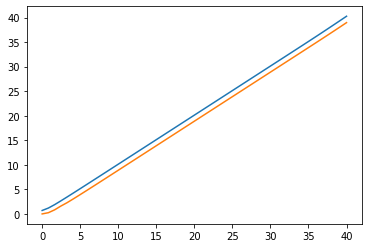

Value Function [[ 3.4095724  -1.80890418]
 [ 4.45270529  2.67026591]
 [ 5.28237136  3.98076162]
 [ 6.02075049  4.86250273]
 [ 6.71395031  5.6337939 ]
 [ 7.37603566  6.34803269]
 [ 8.01405831  7.025495  ]
 [ 8.63206444  7.67575251]
 [ 9.2326306   8.30409435]
 [ 9.8175239   8.91374923]
 [10.38803678  9.50685739]
 [10.94516711 10.08493568]
 [11.48972183 10.64912365]
 [12.02237884 11.20032135]
 [12.5437253  11.7392703 ]
 [13.05428194 12.26660289]
 [13.55451889 12.78287324]
 [14.04486633 13.28857719]
 [14.52572168 13.78416537]
 [14.99745475 14.27005206]
 [15.46041152 14.74662139]
 [15.9149169  15.21423176]
 [16.36127699 15.67321909]
 [16.79978081 16.12389933]
 [17.23070177 16.56657047]
 [17.65429896 17.00151414]
 [18.07081817 17.42899697]
 [18.48049289 17.84927176]
 [18.88354514 18.26257848]
 [19.28018622 18.6691452 ]
 [19.67061748 19.06918888]
 [20.0550309  19.46291614]
 [20.43360974 19.85052388]
 [20.80652918 20.23219998]
 [21.1739569  20.60812388]
 [21.53605391 20.9784672 ]
 [21.89297553

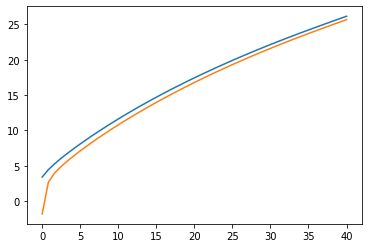

In [16]:
print("Policy Function",Kp_question2)
plt.plot(Kgrid, Kp_question2[:,0])
plt.plot(Kgrid, Kp_question2[:,1])
plt.show()
print("Value Function",Vp_question2)
plt.plot(Kgrid, Vp_question2[:,0])
plt.plot(Kgrid, Vp_question2[:,1])
plt.show()

In [20]:
### Simulation of the shock process for an individual

def simulation(kp, t_simu, trans, kss, kgrid):
    
    np.random.seed(seed=198)
    ϵ = np.random.binomial(1, trans[0, 1], t_simu)
    print("ϵ = ",ϵ)
    
    ksimu = np.ones([t_simu])
    ksimu[0] = kss*3
    
    for t in range(1, t_simu):
        ksimu[t] = interpolant(ksimu[t-1], kgrid, kp[:,ϵ[t]])
        if ksimu[t] < 0:
            ksimu[t] = 0
    
    print(ksimu)
            
    kss_new = np.mean(ksimu[1:])
    
    return kss_new


### Run the value function iteration with the simulation of t periods
epsi_simu = 1
iter_simu = 0
simuT = 50

Kss = find_K_SS(α, β, δ, Ubar)


while (epsi_simu > tol) & (iter_simu < maxiter):
    
    iter_simu += iter_simu
    print("Run for iter_simu = ", iter_simu)
    iter = 0
    epsi = 1

    r = rf(Kss, Ubar)
    w = wf(Kss, Ubar) 


    while (epsi > tol) & (iter < maxiter):


        for ik in range(n):

            for ie in range(Nϵ):

                params1 = r, w, Kgrid, Vp, ϵ, ik, ie, Trans
                Solve = minimize_scalar(Bellman, \
                      bounds=(Kgrid[ik]*0.00001,Kgrid[ik]*(1+r-δ)+w*ϵ[ie]), \
                      args=(params1), method='bounded' )                
                Kp_new[ik, ie] = Solve.x
                Vp_new[ik, ie] = - Solve.fun

        iter += 1

        epsi = ((Vp_new - Vp) ** 2).sum()
        #print("Error term: ", epsi)
        if epsi < tol:
            break
        #Update
        Kp = Kp_new*1.
        Vp = Vp_new*1.
        iter=iter+1
        
    #print("Policy Function",Kp)
    #plt.plot(Kgrid, Kp[:,0])
    #plt.plot(Kgrid, Kp[:,1])
    #plt.show()
    #print("Value Function",Vp)
    #plt.plot(Kgrid, Vp[:,0])
    #plt.plot(Kgrid, Vp[:,1])
    #plt.show()
    
    # Simulation
    kss_n = simulation(Kp, simuT, Trans, Kss, Kgrid)
    print("New simulated kstar", kss_n)
    epsi_simu = (kss_n - Kss) **2
    print("error term for simulation for kss", epsi_simu)
    Kss = kss_n
    


Run for iter_simu =  0
ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
[20.55185272 19.43451988 19.55245175 19.6703655  19.78826184 19.90614125
 18.7889117  18.90694288 19.0249559  19.14295078 19.2609275  19.37888608
 19.49682652 19.61474881 19.73265315 19.85054055 19.96841101 20.08626454
 20.20410113 20.3219208  20.43972353 20.55750942 20.67527874 20.7930315
 20.9107677  21.02848733 21.14619041 21.26387693 21.38154712 21.49920149
 21.61684006 21.73446282 21.85206977 21.96966092 22.08723627 22.20479612
 22.32234099 22.4398709  22.55738584 22.67488582 22.79237083 22.90984089
 23.02729623 23.14473719 23.26216377 23.37957599 23.49697383 22.37922075
 22.49674342 22.61425112]
New simulated kstar 21.077328964891908
error term for simulation for kss 202.39931702905375
Run for iter_simu =  0
ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
[63.23198689 55.65501247 50.50956537 

ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
[30.78541751 28.02270359 26.77643316 25.57408636 24.41492781 23.29818747
 20.80860307 19.82995594 18.89059525 17.98987035 17.12733309 16.30154595
 15.48580585 14.68106798 13.91143851 13.17623627 12.47482577 11.80654195
 11.17070109 10.56657985  9.9933824   9.45069005  8.93781279  8.45374764
  7.99828997  7.57044644  7.16961298  6.79506435  6.44613996  6.12177773
  5.82202034  5.54500137  5.29068539  5.05807654  4.845322    4.65138936
  4.47610114  4.31766488  4.17446046  4.04502351  3.92959527  3.82922618
  3.74195159  3.66606313  3.60007533  3.54269652  3.49280355  2.08927709
  2.13974839  2.18331833]
New simulated kstar 10.238467428031775
error term for simulation for kss 0.0005446813764323623
Run for iter_simu =  0
ϵ =  [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0]
[30.71540228 27.96353005 26.72612998 25.53216583 24.3808

There must be an issue in the value function iteration, as the policy function never is above the 45 degree line, suggesting that people never accumulate capital.
This drives the time iteration to return a NaN value.

Policy Function [[7.97468594e-01 4.23423908e-06]
 [1.15440576e+00 1.22279051e-01]
 [1.75398905e+00 8.26123262e-01]
 [2.45836909e+00 1.31050748e+00]
 [3.26025746e+00 1.91008957e+00]
 [3.96987504e+00 2.58506681e+00]
 [4.70776567e+00 3.29468462e+00]
 [5.45438722e+00 4.09061213e+00]
 [6.20875062e+00 4.86386849e+00]
 [6.96916798e+00 5.61048862e+00]
 [7.73390082e+00 6.36485224e+00]
 [8.50192734e+00 7.12527017e+00]
 [9.27258654e+00 7.89000040e+00]
 [1.00454083e+01 8.65802869e+00]
 [1.08200466e+01 9.42868920e+00]
 [1.15962335e+01 1.02015111e+01]
 [1.23737620e+01 1.09761486e+01]
 [1.31524663e+01 1.17523354e+01]
 [1.39322127e+01 1.25298639e+01]
 [1.47128837e+01 1.33085684e+01]
 [1.55163266e+01 1.40883132e+01]
 [1.63254230e+01 1.48689853e+01]
 [1.71063274e+01 1.56502318e+01]
 [1.78878370e+01 1.64311364e+01]
 [1.86703305e+01 1.72126470e+01]
 [1.94535570e+01 1.79951392e+01]
 [2.02374255e+01 1.87808164e+01]
 [2.10218951e+01 1.95969345e+01]
 [2.18068395e+01 2.03935291e+01]
 [2.25922112e+01 2.11779985

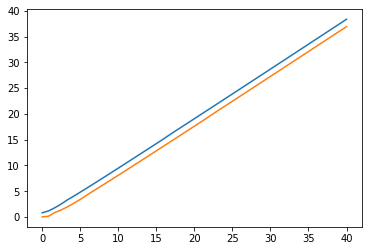

Value Function [[ 6.2558416   0.88946608]
 [ 7.07728206  5.3170332 ]
 [ 7.74183336  6.4588285 ]
 [ 8.32134458  7.20806959]
 [ 8.84712849  7.8513584 ]
 [ 9.3385125   8.42021967]
 [ 9.80628641  8.94210065]
 [10.25417995  9.42994917]
 [10.68508517  9.89317121]
 [11.10127923 10.33715446]
 [11.50450295 10.76480006]
 [11.89609974 11.17820979]
 [12.27714739 11.57899014]
 [12.64853439 11.96840419]
 [13.01100786 12.34747671]
 [13.3652062  12.71705862]
 [13.7116822  13.07786926]
 [14.05091988 13.43052589]
 [14.38334698 13.77556475]
 [14.70934463 14.11345659]
 [15.02922028 14.44461839]
 [15.34314273 14.76942235]
 [15.65139536 15.08819807]
 [15.95429264 15.40121074]
 [16.25210597 15.70863925]
 [16.54506913 16.01073798]
 [16.83339338 16.30777802]
 [17.11727396 16.59992009]
 [17.39688614 16.88735496]
 [17.67239102 17.17037606]
 [17.94394475 17.44916399]
 [18.21169365 17.72387709]
 [18.47577342 17.99467105]
 [18.73631106 18.26168931]
 [18.99342571 18.5250655 ]
 [19.24722929 18.78492485]
 [19.4978272 

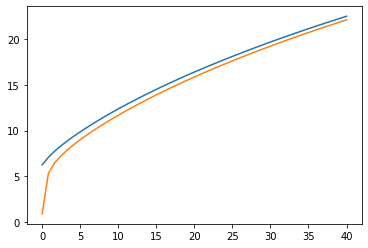

In [21]:
Kp_question3 = Kp
Vp_question3 = Vp

print("Policy Function",Kp_question3)
plt.plot(Kgrid, Kp_question3[:,0])
plt.plot(Kgrid, Kp_question3[:,1])
plt.show()
print("Value Function",Vp_question3)
plt.plot(Kgrid, Vp_question3[:,0])
plt.plot(Kgrid, Vp_question3[:,1])
plt.show()